<h1 style = "color: green"> Esercitazione 1 </h1>

<h3 style = "color: blue"> Esercizio 1.1 </h3>

In tutte le esercitazioni di questo corso useremo lo stesso generatore di numeri pseudo-casuali (un generatore lienare congruenziale, chiamato RANNYU). L'obiettivo di questo primo esercizio è quello di testarlo.  

Per prima cosa, stimiamo $\langle r \rangle = \int_0^1 r dr = 1/2$ con il metodo della media, dove $r$ è una variabile casuale estratta uniformemente nell'intervallo di integrazione $[0,1)$.  
La media è stata calcolata tramite il metodo della media a blocchi, in modo da ottenere anche un'incertezza statistica adeguata, che è la deviazione standard della media di $r$.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# function to open a file and read 2 values per line (mean and error)
def openFile2(name):
    dataFile = open(name, "r")
    lines = dataFile.readlines()
    fileLength = len(lines)
    mean = np.empty(fileLength)
    error = np.empty(fileLength)
    
    for i in range(fileLength):
        values = lines[i].split()
        mean[i], error[i] = float(values[0]), float(values[1])

    dataFile.close()
    
    return mean, error, fileLength

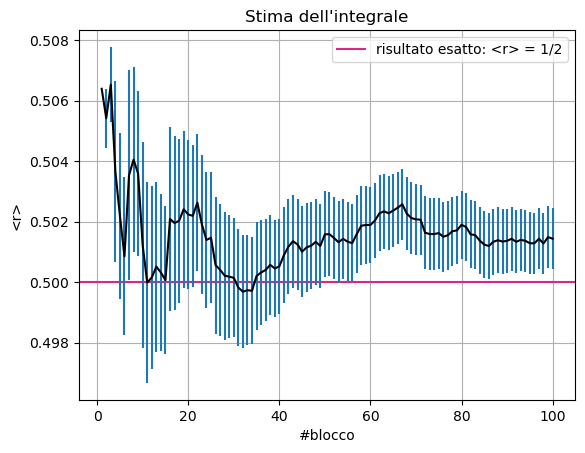

In [2]:
mean, error, length = openFile2("code/data/data-1.1.1.out")

x = np.arange(length) + 1

plt.axhline(0.5, color = "#d82786", label = "risultato esatto: <r> = 1/2")
plt.errorbar(x, mean, yerr = error, color = "black", ecolor = "#1f77b4")
plt.title("Stima dell'integrale")
plt.xlabel("#blocco")
plt.ylabel("<r>")
plt.legend()
plt.grid(True)
plt.show()

In questo caso la stima finale dell'integrale si trova entro poco più di un'incertezza dal risultato esatto, la consideriamo quindi compatibile con esso. Notiamo che, durante l'operazione di media a blocchi, l'incertezza diminuisce e il valor medio si stabilizza, oscillando sempre meno. In totale abbiamo generato $100000$ valori di $r$, divisi in $100$ blocchi uguali. Il piccolo scostamento della stima dal valore vero è dovuto alla natura pseudo-casuale del metodo con cui è stata generata: cambiando seme del generatore casuale si possono trovare risultati più vicini al valore vero (o anche più lontani, ma sempre compatibili con esso dopo un numero elevato di estrazioni).

Ora possiamo stimare la varianza, il cui valore esatto è $\sigma^2 = \langle (r-1/2)^2 \rangle = \int_0^1 (r-1/2)^2 dr = 1/12$.
 

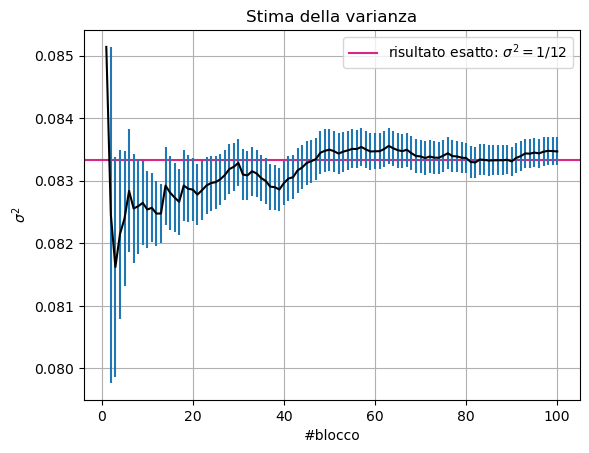

In [3]:
mean, error, length = openFile2("code/data/data-1.1.2.out")

x = np.arange(length) + 1

plt.axhline(1/12, color = "#d82786", label = "risultato esatto: $\sigma^2 = 1/12$")
plt.errorbar(x, mean, yerr = error, color = "black", ecolor = "#1f77b4")
plt.title("Stima della varianza")
plt.xlabel("#blocco")
plt.ylabel("$\sigma^2$")
plt.legend()
plt.grid(True)
plt.show()

In questo caso la stima risulta essere entro un'incertezza dal valore vero. Notiamo inoltre lo stesso comportamento di incertezza e valor medio del caso precedente, caratteristico della media a blocchi.

Una prova più convincente che il generatore estragga effettivamente dei buoni numeri pseudo-casuali distribuiti uniformemente, può essere ottenuta tramite un test del $\chi^2$. Dividiamo l'intervallo $[0,1)$ in $M=100$ sotto-intervalli uguali e, per 100 volte, generiamo $n=10^4$ numeri in $[0,1)$ con cui riempiamo un istogramma. Ogni volta calcoliamo:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
dove $n_i$ è il numero di eventi osservati in ogni sotto intervallo, che in media dovrebbe essere $n/M=100$.  
Ci aspettiamo che $(n_i - n/M)^2 \simeq n/M$, e quindi $\chi^2 \simeq \sum_{i=1}^M{1}=100$ che è il numero di gradi di libertà, cioè di sotto-intervalli.  

Generiamo quindi un istogramma con i 100 valori del $\chi^2$ ottenuti, che dovrebbe approssimare la distribuzione del $\chi^2$ con 100 gradi di libertà.

La media è: <chi^2> = 98.79
La varianza è: sigma^2 = 180.64


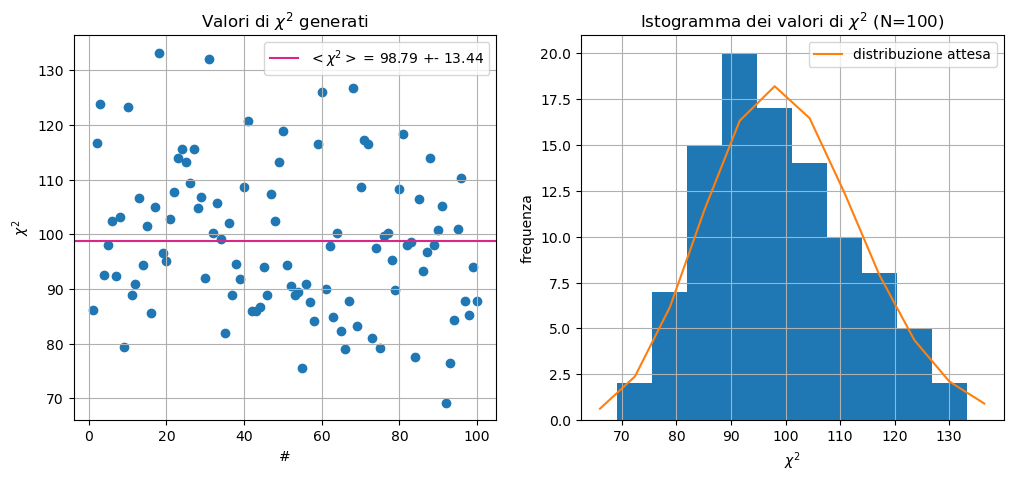

In [4]:
# function to open a file and read one value per line
def openFile1(name):
    dataFile = open(name, "r")
    lines = dataFile.readlines()
    fileLength = len(lines)

    data = np.empty(fileLength)

    for i in range(fileLength):
        data[i] = float(lines[i])

    dataFile.close()
    
    return data, fileLength



chi2, length = openFile1("code/data/data-1.1.3.out")
x = np.arange(length) + 1

mean = np.average(chi2)
std = np.std(chi2)
print("La media è: <chi^2> = %.2f" % mean)
print("La varianza è: sigma^2 = %.2f" % (std * std))

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

# scatter plot of the data
ax[0].axhline(mean, color = "#d82786", label = "$<\chi^2>$ = %.2f" % mean + " +- %.2f" % std)
ax[0].scatter(x, chi2)
ax[0].set(title = "Valori di $\chi^2$ generati", xlabel = "#", ylabel = "$\chi^2$")
ax[0].legend()
ax[0].grid(True)


# histogram
k = 100
nBins = 10
counts, bins = np.histogram(chi2, nBins)
width = np.ptp(chi2) / nBins

x = bins - width * 0.5
x = np.append(x, bins[-1] + width * 0.5)

# this is the chi^2 pdf. The gamma function of an integer x is (x-1)!.
y = np.power(x, k * 0.5 - 1) * np.exp(- x * 0.5) / (np.power(2., k * 0.5) * np.math.factorial(int(k * 0.5 - 1)))

# we need to "un-normalize" the pdf
y *= width * length

ax[1].stairs(counts, bins, fill = True)
ax[1].set(title = "Istogramma dei valori di $\chi^2$ (N=100)", xlabel = "$\chi^2$", ylabel = "frequenza")
ax[1].plot(x, y, label = "distribuzione attesa")
ax[1].legend()
ax[1].grid(True)

plt.show()

Dai due grafici notiamo come il valor medio dei 100 valori di $\chi^2$ sia molto vicino al numero di gradi di libertà $M=100$, e anche la loro distribuzione segue all'incirca quella attesa. Per questa distribuzione $\sigma^2=2M=200$; in effetti otteniamo $\sigma^2 \simeq 181$. Il massimo della distribuzione di $\chi^2$ non è esattamente $100$ (il numero di gradi di libertà), ma in questo caso è $M-2=98$ (nell'istogramma precedente, la posizione del massimo della distribuzione attesa è dovuta in realtà a come abbiamo scelto i bin).  
Possiamo ripetere la stessa analisi con un campione di $10^4$ valori di $\chi^2$, stimati nello stesso modo, per aumentare la statistica. 

La media è: <chi^2> = 99.142
La varianza è: sigma^2 = 195.77

Parametri del fit:
media = 99.142
sigma = 13.992


[]

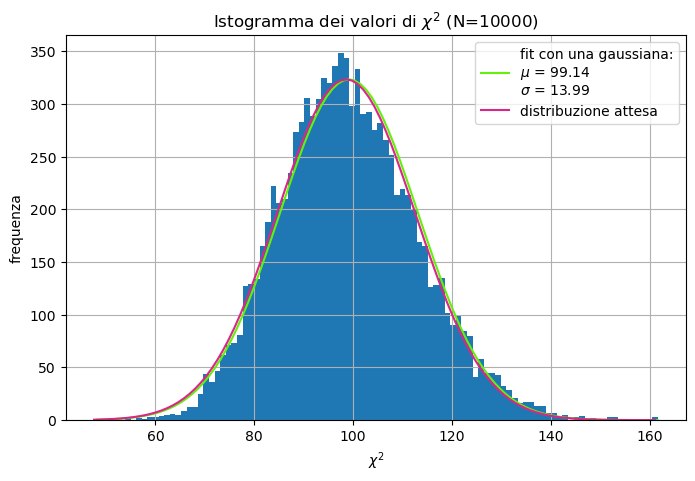

In [5]:
from scipy.stats import norm


# "nr" stands for "not requested", this file is NOT generated when running the c++ code
chi2, length = openFile1("code/data/nr_data-1.1.3.out")

mean = np.average(chi2)
std = np.std(chi2)
print("La media è: <chi^2> = %.3f" % mean)
print("La varianza è: sigma^2 = %.2f" % (std * std))


k = 100
nBins = 100
counts, bins = np.histogram(chi2, nBins)
width = np.ptp(chi2) / nBins

x = bins - width * 0.5

# this is the chi^2 pdf. The gamma function of an integer x is (x-1)!.
y = np.power(x, k * 0.5 - 1) * np.exp(- x * 0.5) / (np.power(2., k * 0.5) * np.math.factorial(int(k * 0.5 - 1)))

# we need to "un-normalize" the pdf, by multiplying it by bin-width * number-of-data
y *= width * length


fig, ax = plt.subplots(figsize = (8, 5))


ax.stairs(counts, bins, fill = True)


# fit the histogram with a gaussian pdf, since the chi^2 distribution converges to it
mean, sigma = norm.fit(chi2)
y = norm.pdf(bins, mean, sigma) * width * length # "un-normalize" the fit line
ax.plot(bins, y, color = "#63f00c", label = "fit con una gaussiana:\n" + "$\mu$ = %.2f" % mean + "\n$\sigma$ = %.2f" % sigma)

print("\nParametri del fit:")
print("media = %.3f" % mean)
print("sigma = %.3f" % sigma)


ax.set(title = "Istogramma dei valori di $\chi^2$ (N=10000)", xlabel = "$\chi^2$", ylabel = "frequenza")
ax.plot(x, y, color = "#d82786",  label = "distribuzione attesa")
ax.legend()
ax.grid(True)

plt.plot()

Con più statistica notiamo come: i valori generati seguano davvero la distribuzione attesa, il massimo della distribuzione sia effettivamente in $x=98$, mentre la media $\langle \chi^2 \rangle \simeq 99$ e la varianza, $\sigma^2 \simeq 196$, siano più vicini ai valori attesi.  
Come spiegato nel seguito, questa distribuzione converge a una gaussiana che ha come valor medio il numero di gradi di libertà.  

Possiamo concludere che il generatore di numeri pseudo-casuali fornito è buono, come del resto ci aspettavamo.

<h3 style = "color:blue"> Esercizio 1.2 </h3>

Ci proponiamo ora di verificare il teorema del limite centrale: tramite il metodo dell'inversione della cumulativa siamo in grado di generare numeri casuali che seguono una distribuzione esponenziale $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ e una distribuzione di Cauchy-Lorentz $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$, oltre alla distribuzione uniforme.  
Possiamo quindi creare, per ognuna di queste tre distribuzioni, degli istogrammi con $10^4$ valori della media di $N$ variabili casuali, con $N=1, 2, 10, 100$. Per il caso $N=100$ ci aspettiamo, per il teorema del limite centrale, che l'istogramma ottenuto approssimi una gaussiana per i casi uniforme ed esponenziale, mentre dovrebbe rimanere una distribuzione di Cauchy-Lorentz per quest'ultimo caso, essendo essa stessa un attrattore.  
Per la distribuzione esponenziale usiamo come parametro $\lambda=1$, per quella di Cauchy-Lorentz usiamo $\mu=0$ e $\Gamma=1$.

In [6]:
from scipy.stats import cauchy


# function to read the output files for this exercise
def readFile(name):
    dataFile = open(name, "r")
    lines = dataFile.readlines()
    fileLength = len(lines)

    data1, data2, data10, data100 = np.empty(fileLength), np.empty(fileLength), np.empty(fileLength), np.empty(fileLength)

    for i in range(fileLength):
        values = lines[i].split()
        data1[i], data2[i], data10[i], data100[i] = float(values[0]), float(values[1]), float(values[2]), float(values[3])

    dataFile.close()
    
    return length, data1, data2, data10, data100

Parametri del fit:
media = 0.50004
sigma = 0.02879


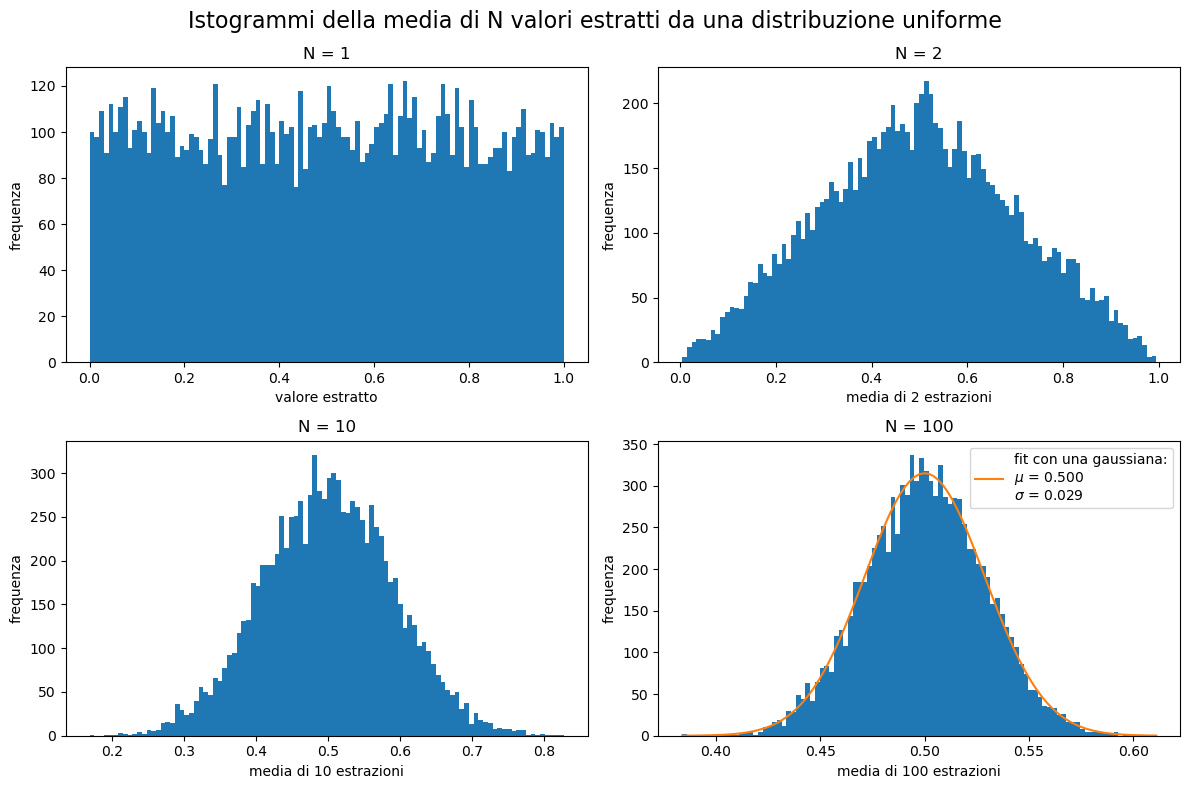

In [7]:
# uniform case
length, data1, data2, data10, data100 = readFile("code/data/data-1.2-uniform.out")


fig, ax = plt.subplots(2, 2, figsize = (12, 8))

nBins = 100


ax[0, 0].hist(data1, nBins)
ax[0, 0].set(title = "N = 1", xlabel = "valore estratto", ylabel = "frequenza")

ax[0, 1].hist(data2, nBins)
ax[0, 1].set(title = "N = 2", xlabel = "media di 2 estrazioni", ylabel = "frequenza")

ax[1, 0].hist(data10, nBins)
ax[1, 0].set(title = "N = 10", xlabel = "media di 10 estrazioni", ylabel = "frequenza")

n, bins, patches = ax[1, 1].hist(data100, nBins)
ax[1, 1].set(title = "N = 100", xlabel = "media di 100 estrazioni", ylabel = "frequenza")


# fit the histogram for N=100 with a gaussian pdf
mean, sigma = norm.fit(data100)
y = norm.pdf(bins, mean, sigma) * np.ptp(data100) / nBins * length # "un-normalize" the fit line
ax[1, 1].plot(bins, y, label = "fit con una gaussiana:\n" + "$\mu$ = %.3f" % mean + "\n$\sigma$ = %.3f" % sigma)
ax[1, 1].legend()

print("Parametri del fit:")
print("media = %.5f" % mean)
print("sigma = %.5f" % sigma)


fig.suptitle("Istogrammi della media di N valori estratti da una distribuzione uniforme", fontsize = 16)
fig.tight_layout()
plt.show()

Parametri del fit:
media = 0.99954
sigma = 0.09971


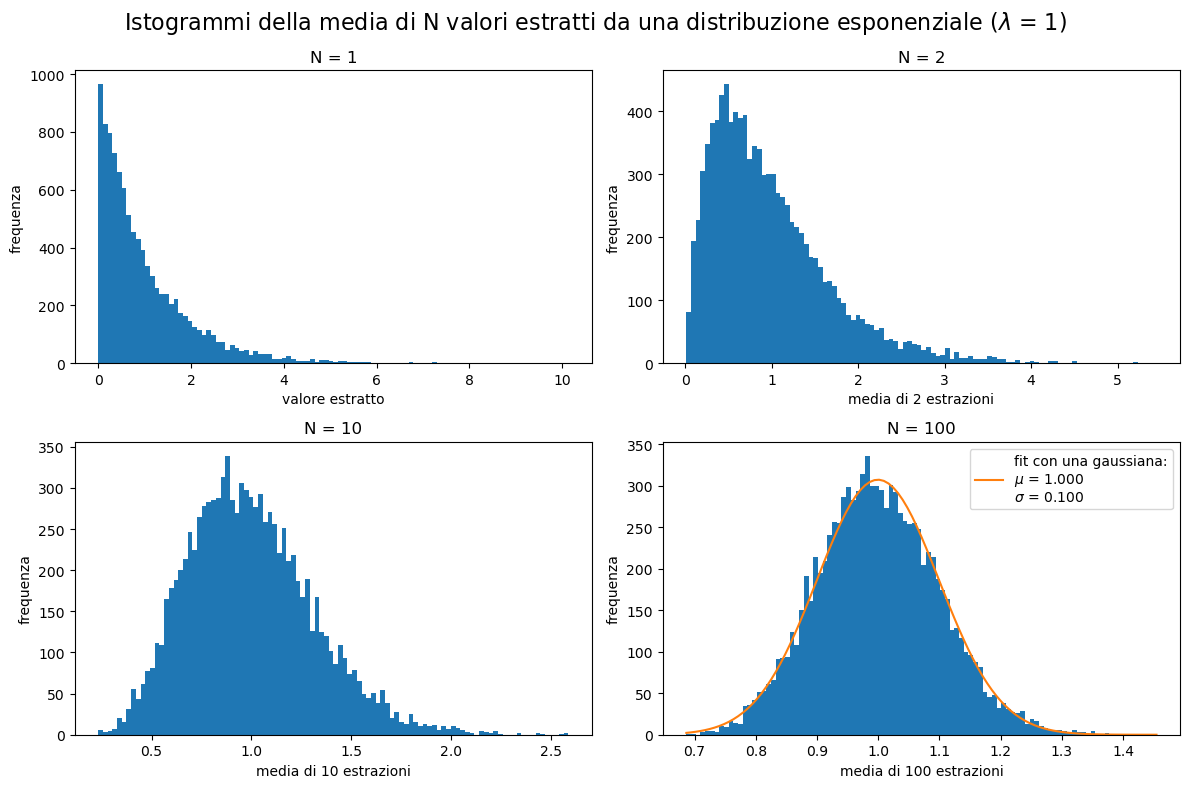

In [8]:
# exponential case
length, data1, data2, data10, data100 = readFile("code/data/data-1.2-exp.out")


fig, ax = plt.subplots(2, 2, figsize = (12, 8))

nBins = 100


ax[0, 0].hist(data1, nBins)
ax[0, 0].set(title = "N = 1", xlabel = "valore estratto", ylabel = "frequenza")

ax[0, 1].hist(data2, nBins)
ax[0, 1].set(title = "N = 2", xlabel = "media di 2 estrazioni", ylabel = "frequenza")

ax[1, 0].hist(data10, nBins)
ax[1, 0].set(title = "N = 10", xlabel = "media di 10 estrazioni", ylabel = "frequenza")

n, bins, patches = ax[1, 1].hist(data100, nBins)
ax[1, 1].set(title = "N = 100", xlabel = "media di 100 estrazioni", ylabel = "frequenza")


# fit the histogram for N=100 with a gaussian pdf
mean, sigma = norm.fit(data100)
y = norm.pdf(bins, mean, sigma) * np.ptp(data100) / nBins * length # "un-normalize" the fit line
ax[1, 1].plot(bins, y, label = "fit con una gaussiana:\n" + "$\mu$ = %.3f" % mean + "\n$\sigma$ = %.3f" % sigma)
ax[1, 1].legend()

print("Parametri del fit:")
print("media = %.5f" % mean)
print("sigma = %.5f" % sigma)


fig.suptitle("Istogrammi della media di N valori estratti da una distribuzione esponenziale ($\lambda$ = 1)", fontsize = 16)
fig.tight_layout()
plt.show()

Parametri del fit:
media = 0.00715
Gamma = 0.09971


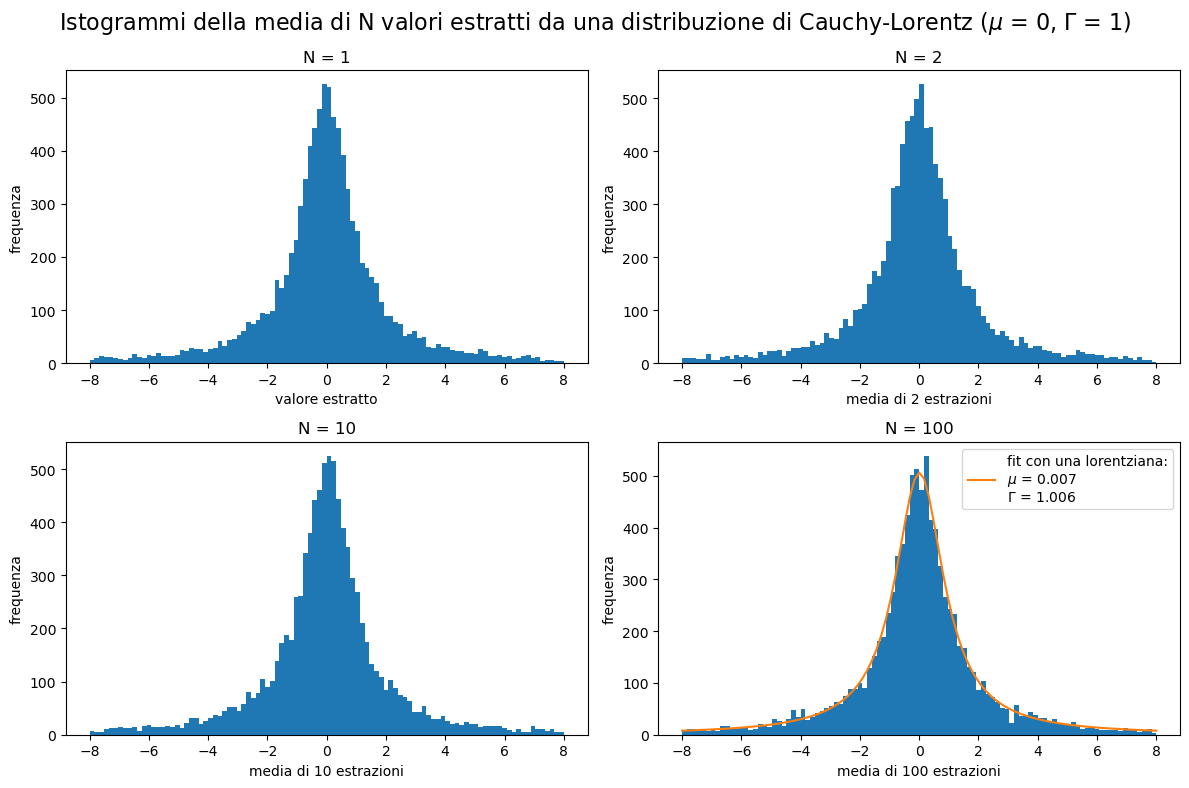

In [9]:
# Cauchy-Lorentz case
length, data1, data2, data10, data100 = readFile("code/data/data-1.2-lorentz.out")


fig, ax = plt.subplots(2, 2, figsize = (12, 8))

nBins = 100
lim = (-8., 8.)


ax[0, 0].hist(data1, nBins, lim)
ax[0, 0].set(title = "N = 1", xlabel = "valore estratto", ylabel = "frequenza")

ax[0, 1].hist(data2, nBins, lim)
ax[0, 1].set(title = "N = 2", xlabel = "media di 2 estrazioni", ylabel = "frequenza")

ax[1, 0].hist(data10, nBins, lim)
ax[1, 0].set(title = "N = 10", xlabel = "media di 10 estrazioni", ylabel = "frequenza")

n, bins, patches = ax[1, 1].hist(data100, nBins, lim)
ax[1, 1].set(title = "N = 100", xlabel = "media di 100 estrazioni", ylabel = "frequenza")

# fit the histogram for N=100 with a Cauchy-Lorentz pdf
mean, Gamma = cauchy.fit(data100)
y = cauchy.pdf(bins, mean, Gamma) * (lim[1] - lim[0]) / nBins * length  # "un-normalize" the fit line
ax[1, 1].plot(bins, y, label = "fit con una lorentziana:\n" + "$\mu$ = %.3f" % mean + "\n$\Gamma$ = %.3f" % Gamma)
ax[1, 1].legend()

print("Parametri del fit:")
print("media = %.5f" % mean)
print("Gamma = %.5f" % sigma)

fig.suptitle("Istogrammi della media di N valori estratti da una distribuzione di Cauchy-Lorentz ($\mu$ = 0, $\Gamma$ = 1)", fontsize = 16)
fig.tight_layout()
plt.show()

Gli istogrammi per $N=100$ dei valori estratti da distribuzioni uniforme ed esponenziale mostrano che queste convergono a una gaussiana, verificando il teorema del limite centrale.  

Gli istogrammi per i valori estratti dalla distribuzione di Cauchy-Lorentz restano invece all'incirca simili, ma, per quando detto sopra, in questo caso è proprio quello che prevede il teorema del limite centrale, esteso a distribuzioni con varianza divergente.  
In quest'ultimo caso abbiamo limitato manualmente i grafici all'intervallo $(-8, 8)$ poichè, a causa delle code della lorentziana, alcuni valori sono estratti molto lontano dal valor medio $\mu=0$. Per tenerne conto dovremmo creare un istogramma con un numero molto elevato di bin o con bin molto larghi, che lo renderebbe privo di significato.  

Anche la distribuzione del $\chi^2$ dell'esercizio precedente converge a una gaussiana, essendo la somma di $M=100$ variabili casuali.  

Abbiamo quindi verificato il teorema del limite centrale per le distribuzioni uniforme, esponenziale e lorentziana. Ovviamente questo teorema è valido, quindi questa è un'ulteriore prova della bontà del generatore di numeri pseudo-casuali.

<h3 style = "color:blue"> Esercizio 1.3 </h3>

Infine, possiamo usare il generatore di numeri casuali per simulare l'esperimento di Buffon per la stima di $\pi$.  
L'esperimento consiste nel lanciare in modo casuale un ago di lunghezza $L$ su un piano con una serie di rette a distanza costante $d>L$ tra loro. La probabilità che l'ago intersechi una delle rette è:
$$P=\frac{2L}{\pi d}=\lim_{N \to \infty}\frac{N_{int}}{N}$$
dove $N$ è il numero di lanci totali dell'ago e $N_{int}$ è il numero di volte in cui l'ago interseca una retta.  
Invertendo si ottiene:
$$\pi=\lim_{N \to \infty}\frac{2LN}{dN_{int}}$$  

Per simulare questo esperimento ci basta considerare una sola striscia compresa tra due rette: immaginando che queste siano orizzontali, ne avremo una in $y=0$ e l'altra in $y=d$. Simuliamo l'ago come due punti a distanza $L$ tra loro. In realtà siamo interessati solo alla coordinata $y$ di questi punti. Estraiamo quindi la posizione del primo estremo, $y_1 \in[0, d)$, aperto poichè, per avere un pattern che si ripete, la seconda retta deve essere "esclusa". La posizione del secondo estremo potrebbe essere generata estraendo casualmente un angolo $\theta \in [0, 2\pi)$ e usandolo per calcolare $y_2=y_1+Lsin(\theta)$, ma così facendo useremmo il valore di $\pi$ per calcolare $\pi$.  
Notiamo dall'equazione precedente che in realtà ci basta estrarre $sin(\theta) \in [-1, 1]$. Per farlo, estraiamo una coppia di numeri $(x, y)$ in quell'intervallo (punto in un quadrato) e, se il punto è contenuto nella circonferenza di raggio $r=1$ centrata nell'origine, $x$ e $y$ saranno distribuiti il primo come un coseno e il secondo come un seno.  

Abbiamo effettuato $10^7$ lanci divisi in $250$ blocchi.

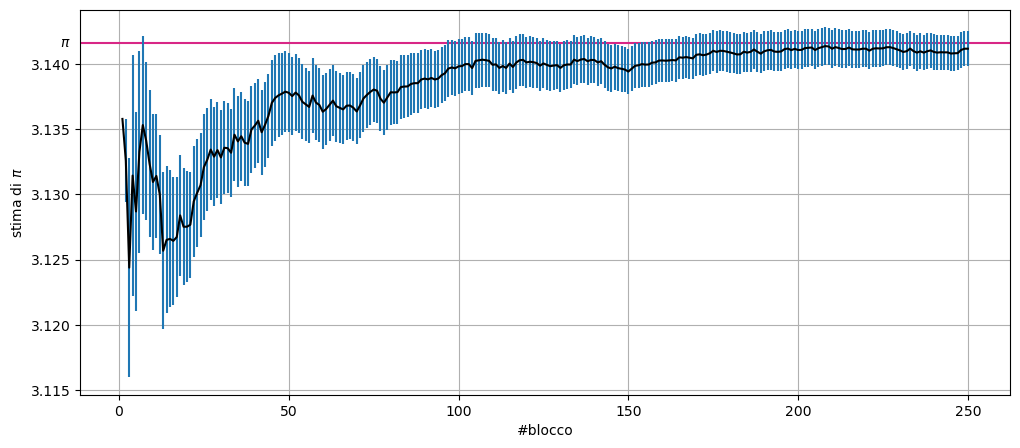

Valore stimato: pi = 3.1412 +- 0.0013


In [10]:
mean, error, length = openFile2("code/data/data-1.3.out")
x = np.arange(length) + 1

plt.figure(figsize = (12, 5))

plt.axhline(np.pi, color = "#d82786")
plt.errorbar(x, mean, yerr = error, color = "black", ecolor = "#1f77b4")
plt.xlabel("#blocco")
plt.ylabel("stima di $\pi$")
plt.text(-17.5, 3.1413, "$\pi$")

plt.grid(True)
plt.show()

print("Valore stimato: pi = %.4f" % mean[-1] + " +- %.4f" % error[-1])

Otteniamo una stima di $\pi$ compatibile con il valore vero entro l'incertezza.